## Install necessary packages

In [1]:
# need to first install the following packages
# create new conda environment first

# run the following commands in the terminal to install the required packages:


# conda create -n fluxoniumDB python=3.12 -y
# conda activate fl'uxoniumDB
# conda install matplotlib numpy pandas seaborn notebook jupyter -y
# conda install -c conda-forge scqubits -y

# took ~5 minutes to install


# switch to that environment in the noteobok

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scqubits as scq
import pandas as pd
import seaborn as sns
import matplotlib

# import matplotlib
from tqdm import tqdm

# set matplotlib style
plt.style.use('petroff10')

# import matplotlib
# matplotlib.use('svg') 

scq.__version__

%matplotlib inline

plt.rcParams['figure.constrained_layout.use'] = True

In [2]:
data = pd.read_csv('fluxonium.csv')
try: 
    data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')   
except ValueError:
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d') 

In [3]:
# get all the columns
data.columns

Index(['Date', '[Author Year] {Qubit}', 'DOI', 'Published?', 'Measured Lab',
       'Notes', 'EJ (hGHz)', 'EC (hGHz)', 'EL (hGHz)', 'fr (GHz)',
       'kappa/2pi (MHz)', 'g/2pi (hMHz)', 'Coherence Loc?', 'chi01 (hMHz)',
       'T1 (us)', 'T2R (us)', 'T2E (us)', 'Fid_ro', 'Grounded/Floating',
       'n_crit', 'n_ro', 't_ro (us)', 'Quantum Amplifier', 'Drive Lines',
       'Bandaging', 'Cavity Type', 'Flux Noise Amplitude (uPhi0)',
       'Cap. Pad Material', 'Qubit Image', 'Measured Area/Perim Image',
       'Loop area (um^2)', 'Loop Perimeter (um)', 'Measured JJ Area',
       'JJ in Array area (um^2)', 'n_JJ_in_Array', 'Special Name', 'Substrate',
       'Superinductance', '# Other Qb', 'Jc (uA/um^2)', 'tan(deltaC) (x10^6)'],
      dtype='object')

The markers list has fewer values (15) than needed (23) and will cycle, which may produce an uninterpretable plot.
 C:\Users\slab\AppData\Local\Temp\ipykernel_21796\3939088551.py: 9

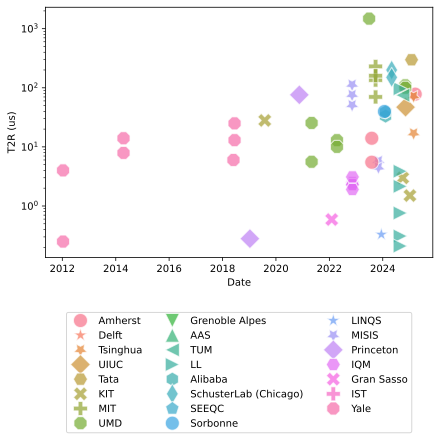

In [14]:
# scatter plot of 'Date' vs 'T2R (us)' at half flux
fig, ax = plt.subplots(figsize=(6, 6))

markers = ["o","*",(5, 1, 180),"D","H","X","P",'8',"v","^","<",">","h","d","p"]

# half-flux data
data_half_flux = data[data['Coherence Loc?'] == 'half-flux']

ax = sns.scatterplot(data_half_flux, x='Date', y='T2R (us)', markers=markers, ax=ax,
                     hue='Measured Lab', style='Measured Lab', s=200, alpha=0.7)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

ax.set_yscale('log')

fig.savefig('half_flux_records.png', dpi=300)